In [69]:
# Classification

In [70]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [71]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [72]:
y.shape

(70000,)

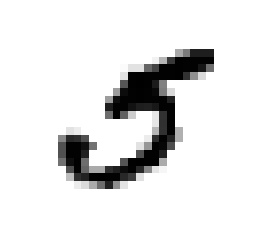

In [73]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape( 28, 28 )

plt.imshow( some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = "nearest")
plt.axis("off")
plt.show()

In [74]:
y[36000]

5.0

In [75]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [76]:
import numpy as np

In [77]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [78]:
y_train_5 = ( y_train == 5 ) # Set all 5's to one
y_test_5 = ( y_test == 5)

In [79]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier( random_state = 42, max_iter = 10 )
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
sgd_clf.predict( [some_digit] )

array([False], dtype=bool)

In [81]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold( n_splits = 3, random_state = 42 )

for train_index, test_index in skfolds.split( X_train, y_train_5 ):
    clone_clf = clone( sgd_clf )
    X_train_folds = X_train[ train_index ]
    y_train_folds = y_train_5[ train_index ]
    X_test_fold = X_train[ test_index ]
    y_test_fold = y_train_5[ test_index ]
    
    clone_clf.fit( X_train_folds, y_train_folds)
    y_pred = clone_clf.predict( X_test_fold )
    n_correct = clone_clf.predict(X_test_fold) == y_test_fold
    print(n_correct / len(y_pred))

[  5.00000000e-05   5.00000000e-05   5.00000000e-05 ...,   5.00000000e-05
   5.00000000e-05   5.00000000e-05]
[  5.00000000e-05   5.00000000e-05   5.00000000e-05 ...,   5.00000000e-05
   5.00000000e-05   5.00000000e-05]
[  5.00000000e-05   5.00000000e-05   5.00000000e-05 ...,   5.00000000e-05
   5.00000000e-05   5.00000000e-05]


In [82]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring = "accuracy")

array([ 0.8494801 ,  0.86219311,  0.87863179])

In [83]:
from sklearn.base import BaseEstimator

class Never5Classifier( BaseEstimator ):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype = bool)

In [88]:
never_5_clf = Never5Classifier()
cross_val_score( never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([ 0.9088 ,  0.91455,  0.9056 ])

In [89]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict( sgd_clf, X_train, y_train_5, cv = 3)

In [90]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53390,  1189],
       [ 1360,  4061]], dtype=int64)

In [91]:
from sklearn.metrics import precision_score, recall_score

precision_score( y_train_5, y_train_pred )

0.7735238095238095

In [92]:
recall_score(y_train_5, y_train_pred )

0.74912377790075635

In [93]:
from sklearn.metrics import f1_score
f1_score( y_train_5, y_train_pred)

0.76112829163152462

In [94]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-42167.8565878])

In [95]:
threshold = 0
y_some_digit_pred = (y_scores > threshold )
y_some_digit_pred

array([False], dtype=bool)

In [96]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [97]:
y_scores = cross_val_predict( sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

In [98]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [99]:
def plot_precision_recall_vs_threshold( precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])

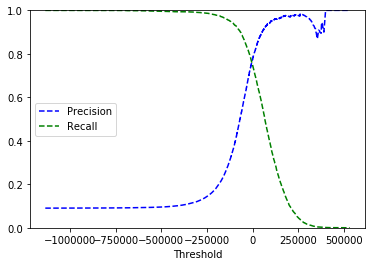

In [100]:
plot_precision_recall_vs_threshold( precisions, recalls, thresholds)
plt.show()

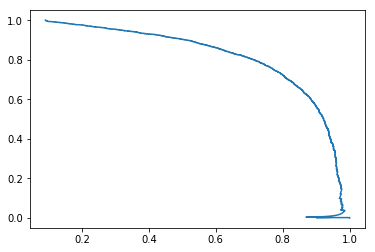

In [101]:
plt.plot(precisions, recalls)
plt.show()

In [102]:
y_train_pred_90 = (y_scores > 70000)

In [103]:
precision_score(y_train_5, y_train_pred_90)

0.92486956521739128

In [104]:
precision_score(y_train_5, y_train_pred_90)

0.92486956521739128

In [105]:
recall_score(y_train_5, y_train_pred_90)

0.49049990776609481

In [106]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [107]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

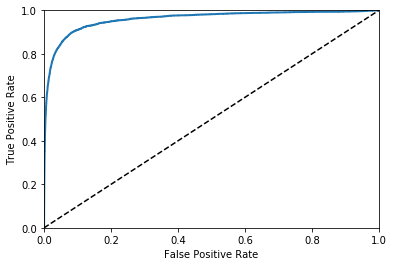

In [108]:
plot_roc_curve(fpr, tpr)
plt.show()

In [109]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.95999645239391573

In [110]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier( random_state = 42, n_estimators = 100 )

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict_proba")

y_scores_forest = y_probas_forest[:,1] # score = proba of positive class
fpr_forest, tpr_forest, threshold_forest = roc_curve( y_train_5, y_scores_forest)

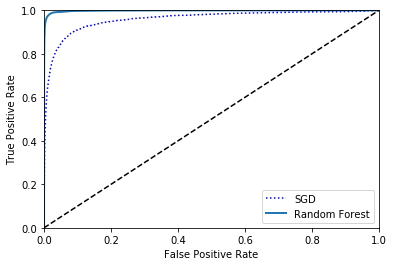

In [111]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()